# Binary Classification with Logistic Regression: The Titanic Dataset

This dataset was made avaliable by Kaggle. It is widely used for educational purposes. Our goal is to optimize the given features for each passenger of the Titanic and fit our logistic regression model to these features, in order to predict if a passenger of the Titanic has survived or not. 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample

SEED = 42
np.random.seed(SEED)


df = pd.read_csv('../dataset/Titanic-Dataset.csv')
df = df.dropna()
df.head()
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


## Data Exploration
First, we will explore some statistics from survivors.

In [32]:
df_surv = df[df['Survived'] == 1]

### Categorical Variables

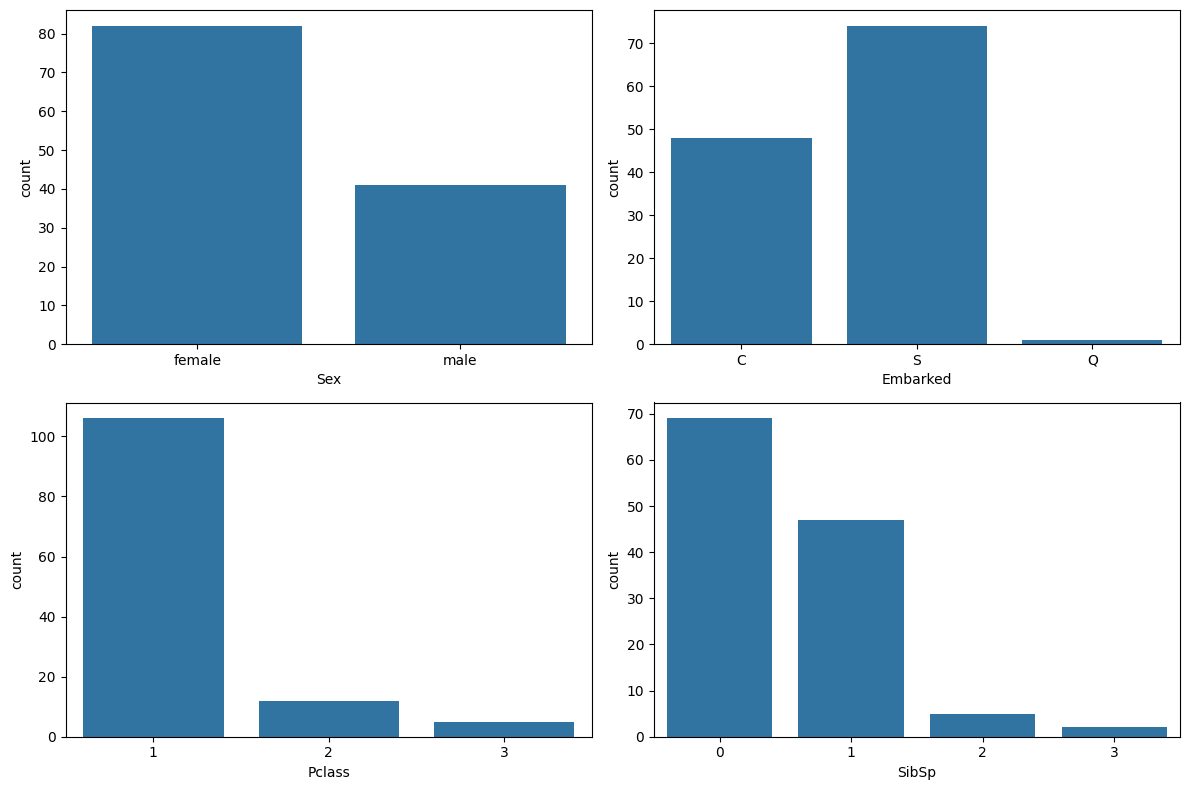

In [33]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.countplot(data=df_surv, x='Sex')

plt.subplot(2, 2, 2)
sns.countplot(data=df_surv, x='Embarked')

plt.subplot(2, 2, 3)
sns.countplot(data=df_surv, x='Pclass')

plt.subplot(2, 2, 4)
sns.countplot(data=df_surv, x='SibSp')

plt.tight_layout()
plt.show()

## Continuous Variables

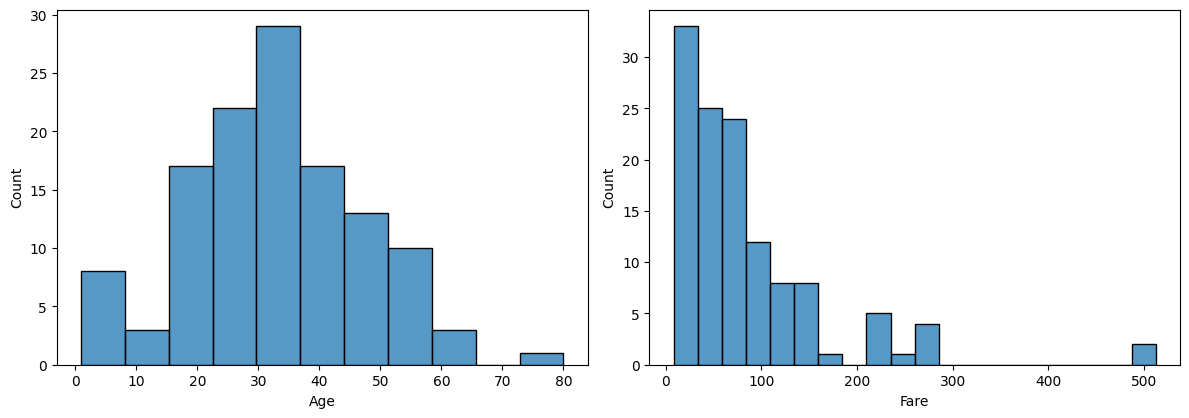

In [34]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.histplot(data=df_surv, x='Age')

plt.subplot(2, 2, 2)
sns.histplot(data=df_surv, x='Fare')


plt.tight_layout()
plt.show()

## Correlations

In [ ]:
df['Sex'] = np.array([1 if s == 'female' else 0 for s in df['Sex']])
df['Pclass'] = np.array([1 if pclass == 1 else 0 for pclass in df['Pclass']])
df = df[['Sex', 'Pclass', 'SibSp', 'Age', 'Fare', 'Survived']]
corr = df.corr()
sns.heatmap(corr, annot=True)

<Axes: >

In [26]:
df = df[['Sex', 'SibSp', 'Age', 'Fare', 'Survived']]

## Load Model

In [27]:
import os
import sys

current_dir = os.getcwd()
model_dir = os.path.join(current_dir, '../ml_model')
sys.path.append(model_dir)

from logistic_regressor import LogisticRegressor

model = LogisticRegressor(regularization='None')

## Prepare Dataset

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from math import floor

X = np.asarray(df[['Sex', 'SibSp', 'Age', 'Fare']])
y = np.asarray(df['Survived'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = train_test_split(X_scaled, test_size=.1)
y_train, y_test = train_test_split(y, test_size=.1)

X_train, X_test = X_train.T, X_test.T
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

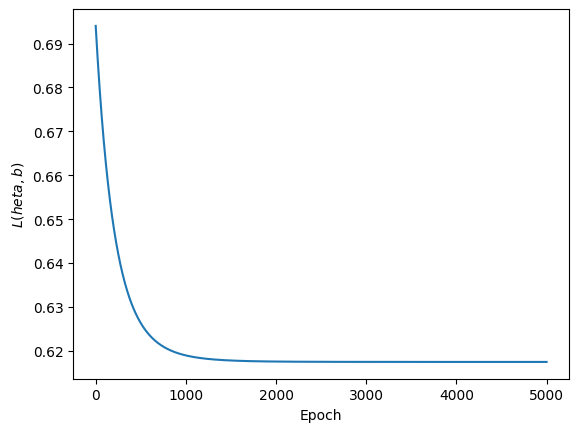

In [ ]:
model.fit(X_train, y_train)    

Accuracy: 73.68 %
Precision: 76.47%
Recall: 92.86 %


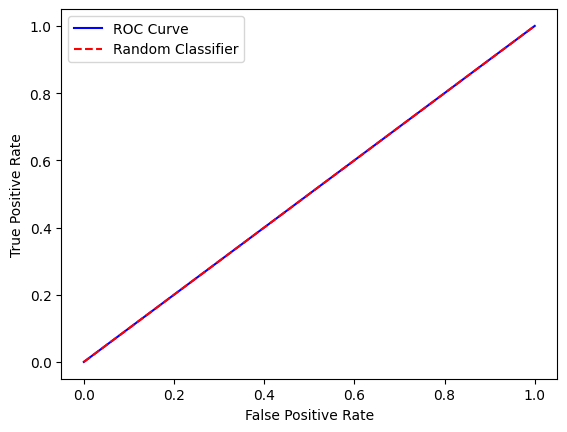

0.41935483870967744

In [30]:
print(f'Accuracy: {np.round(100 * model.accuracy(X_test, y_test), 2)} %')
print(f'Precision: {np.round(100 * model.precision(X_test, y_test), 2)}%')
print(f'Recall: {np.round(100 * model.recall(X_test, y_test), 2)} %')
model.plot_ROC_curve(X_test, y_test)

F1 =2 *  model.precision(X_test, y_test) * model.recall(X_test, y_test) / (model.precision(X_test, y_test) + model.recall(X_test, y_test))
F1